## Group No 32

## Group Member Names:
1. BIDISHA SARMA ( 2023aa05066 )
2. MUGDHA HANS ( 2023aa05570 )
3. SONIKA BENGANI (2023aa05522)
4. VAIBHAV BAJPAI (2023aa05631)

Dataset Link: https://drive.google.com/file/d/18ivVD85YKQqPH0Qhe2Ou10hjuPl-vWxA/view?usp=sharing


Choose any 1 dataset of your choice to perform the assignment.

# 1. Import the required libraries -- Score: 0.5 Marks

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from skimage.feature import hog, local_binary_pattern
from skimage import filters
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# 2. Data Acquisition & Preparation -- Score: 1.5 Marks

For the problem identified by you, students have to find the data source themselves from any data source.

## 2.1 Data Acquisition -- Score: 0.5 Mark

Code for converting the above downloaded data into a form suitable for DL


In [ ]:
# Path to your dataset
train_dataset_path = r"C:\Users\Bidisha\Downloads\archive\rural_and_urban_photos\train"

# Dataset Overview: Example of class labels
categories = ['urban', 'rural']  # Modify according to your dataset


## 2.2 Write your observations from the above.

1. Size of the dataset
2. Plot the distribution of the categories of the target / label.



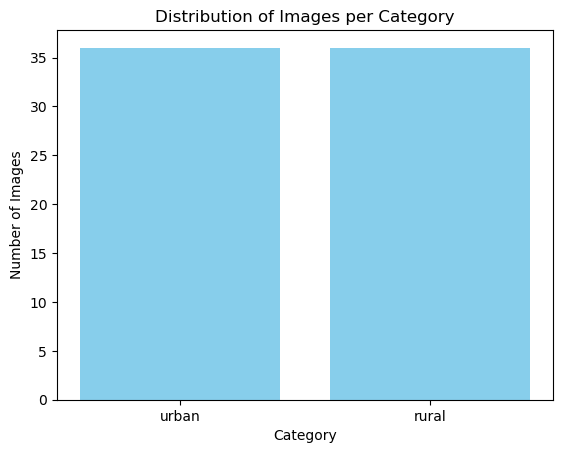

In [ ]:

category_counts = [len(os.listdir(rf'C:\Users\Bidisha\Downloads\archive\rural_and_urban_photos\train\{category}')) for category in categories]

plt.bar(categories, category_counts, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.title('Distribution of Images per Category')
plt.show()

The size of the dataset seems to be approximately 72
Both urban and rural have 36 images each.

## 2.2 Data Preparation -- Score: 1.0 Marks

Perform the data preprocessing that is required for the data that you have downloaded.


This stage depends on the dataset that is used.

## 3.1 Split the data into training set and testing set

In [ ]:
# Function to load dataset and preprocess images
def load_and_preprocess_data(train_dataset_path, categories, img_size=(128, 128)):
    data = []
    labels = []

    for category in categories:
        folder_path = os.path.join(train_dataset_path, category)
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            # Read the image
            img = cv2.imread(img_path)

            # Resize image
            img_resized = cv2.resize(img, img_size)

            # Convert to grayscale
            gray_img = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

            # Apply histogram equalization
            equalized_img = cv2.equalizeHist(gray_img)

            # Store the image and its label
            data.append(equalized_img)
            labels.append(category)

    return np.array(data), np.array(labels)

# Load and preprocess the data
X, y = load_and_preprocess_data(train_dataset_path, categories)

# Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3.2 Feature Engineering -- Score: 3.5 Marks

* Extract the features from the images and concatenate them to create a single for the every images.

* You can choose from the feature processing techniques taught in the class : Low-level Vision: Histogram and Histogram equalization, Gray-scale transformation, Image Smoothing, Connected components in images.
Mid-level Vision:  Edge Detection using Gradients, Sobel, Canny; Line detection using Hough transforms; Semantic information using RANSAC;Image region descriptor using SIFT; Use case: Pedestrian detection Using HoG and SIFT descriptors and SVM

* Create multiple sets of features and store it in seperate dataframes so that you can later use it for training and comparing the models.

* Normalize the DataFrame

* Note : If the feature size is getting too large such that it is not fitting into the RAM of Colab or your system then you can either use PCA or resize the image to smaller dimenssion for reducing the numer of features



In [ ]:
# Extract features (HOG, LBP, Sobel)
def extract_features(images):
    hog_features = []
    lbp_features = []
    sobel_features = []

    for img in images:
        # HOG feature extraction
        fd, _ = hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
        hog_features.append(fd)

        # LBP feature extraction
        lbp = local_binary_pattern(img, P=8, R=1, method='uniform')
        lbp_hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 11), range=(0, 10))
        lbp_features.append(lbp_hist)

        # Sobel edge detection
        edges = filters.sobel(img)
        sobel_hist, _ = np.histogram(edges.ravel(), bins=30, range=(0, 1))
        sobel_features.append(sobel_hist)

    # Stack features together
    features = np.hstack([np.array(hog_features), np.array(lbp_features), np.array(sobel_features)])
    return features

# Feature extraction on training data only
X_train_features = extract_features(X_train)

# Normalize the feature values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_features)

Feature extraction techniques like HOG, LBP, and edge detection are highly effective for distinguishing urban and natural scenes by capturing complementary aspects of the images.
1.  HOG excels at detecting structured, geometric patterns commonly found in urban environments, such as buildings and roads
2. LBP captures texture information, making it useful for identifying repetitive urban textures and irregular natural patterns like foliage and water.
3. Edge detection highlights sharp boundaries typical in urban areas but is less effective for the softer, organic edges in nature.

Together, these features provide a comprehensive representation.

# 4. Model Building - Score: 2.0 Marks

## 4.1 Model Building - Score: 1.5 Marks
* Use any 1 classical machine learning algorithm such as : SVM , Xgboost etc. to train the model
* Train the model on different kinds of feature combination dataframe you created in 3.

In [ ]:

# Train Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

## 4.2 Validation matrix - Score: 0.5 Marks

Print the model accuracy and F1 Score


In [ ]:
# Feature extraction and scaling on the test set
X_test_features = extract_features(X_test)
X_test_scaled = scaler.transform(X_test_features)

# Predict with SVM model
y_pred_svm = svm_model.predict(X_test_scaled)

# Predict with Random Forest model
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Print evaluation metrics
print("SVM Evaluation Metrics:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1-score: {f1_svm:.4f}")

print("\nRandom Forest Evaluation Metrics:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")



SVM Evaluation Metrics:
Accuracy: 0.8667
Precision: 0.8667
Recall: 0.8667
F1-score: 0.8667

Random Forest Evaluation Metrics:
Accuracy: 0.7333
Precision: 0.7738
Recall: 0.7333
F1-score: 0.7407


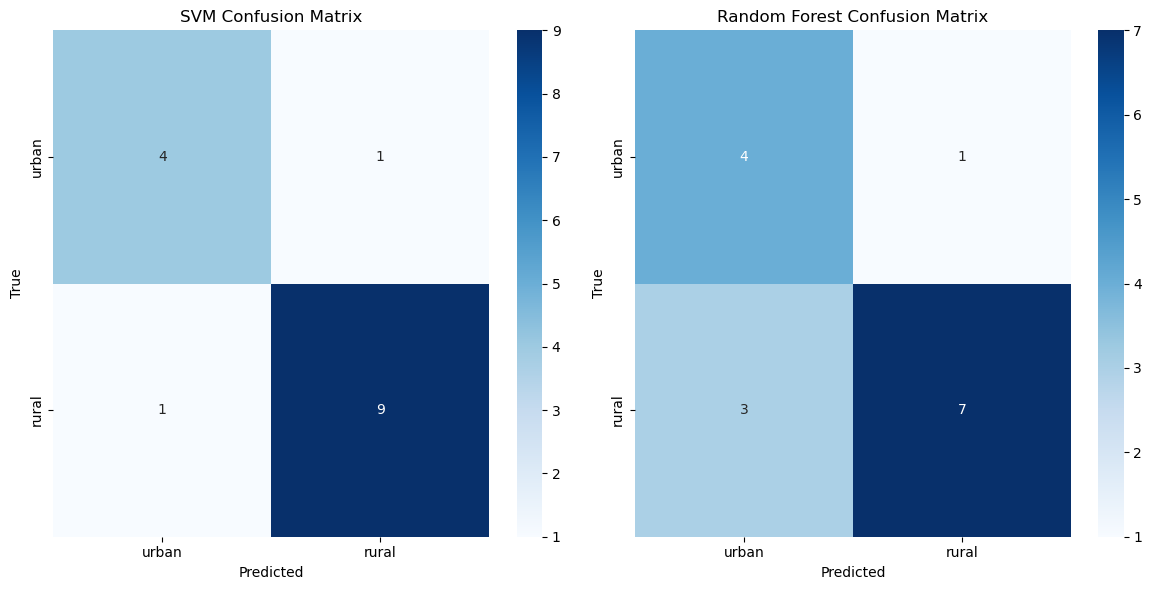

In [ ]:
# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot Confusion Matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# SVM Confusion Matrix
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories, ax=ax[0])
ax[0].set_title('SVM Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('True')

# Random Forest Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories, ax=ax[1])
ax[1].set_title('Random Forest Confusion Matrix')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('True')

plt.tight_layout()
plt.show()


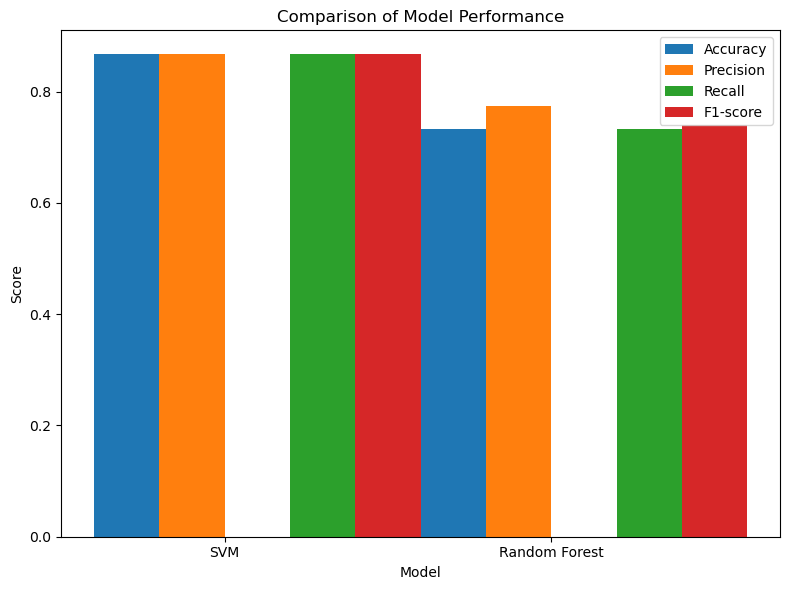

In [ ]:
# Bar Chart to compare metrics for both models
models = ['SVM', 'Random Forest']
accuracy = [accuracy_svm, accuracy_rf]
precision = [precision_svm, precision_rf]
recall = [recall_svm, recall_rf]
f1 = [f1_svm, f1_rf]

x = np.arange(len(models))  # The label locations

# Plot metrics
fig, ax = plt.subplots(figsize=(8, 6))
width = 0.2  # the width of the bars
ax.bar(x - width*1.5, accuracy, width, label='Accuracy')
ax.bar(x - width/2, precision, width, label='Precision')
ax.bar(x + width*1.5, recall, width, label='Recall')
ax.bar(x + width*2.5, f1, width, label='F1-score')

ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Comparison of Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()


# 5. Model Inference & Evaluation - Score: 1 Mark

Plot any 5 random test images and their predicted and actual true labels using the model and feature set which gave you the best accuracy/F1 score.


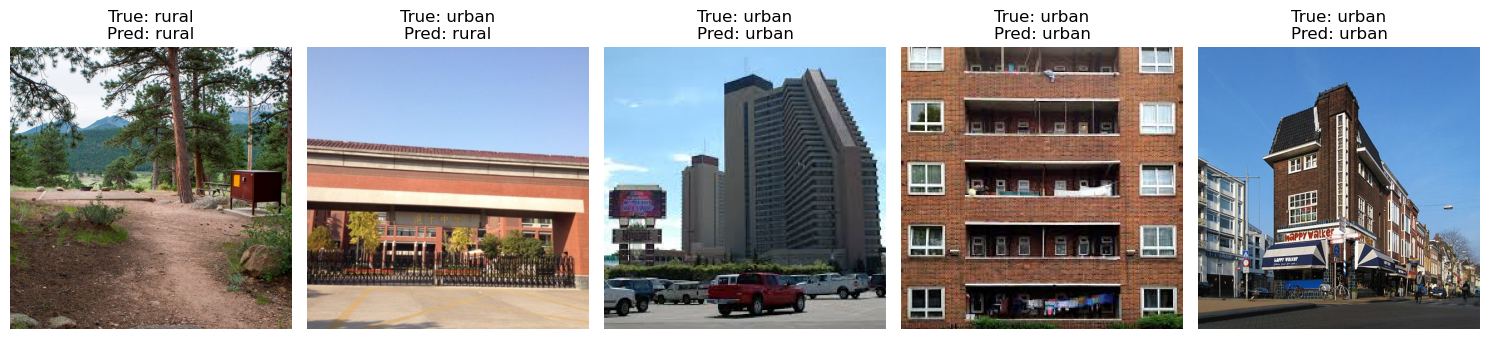

In [ ]:
import random
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the validation dataset (update the path accordingly)
val_dataset_path = r'C:\Users\Bidisha\Downloads\archive\rural_and_urban_photos\val'

# List all categories in the validation folder (assuming it's organized by subfolders)
categories = [category for category in os.listdir(val_dataset_path) if os.path.isdir(os.path.join(val_dataset_path, category))]

# Select the best model based on the highest F1-score or accuracy
best_model = rf_model if f1_rf > f1_svm else svm_model
best_model_name = "Random Forest" if best_model == rf_model else "SVM"

# Function to preprocess and extract features
def preprocess_and_extract_features(image):
    # Resize image to standard size (128x128)
    image_resized = cv2.resize(image, (128, 128))

    # Convert to grayscale if it is not already grayscale
    if len(image_resized.shape) == 3:
        gray_image = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image_resized

    # Apply histogram equalization
    equalized_image = cv2.equalizeHist(gray_image)

    # Extract features (HOG, LBP, Sobel)
    features = extract_features([equalized_image])

    return features

# Randomly select 5 images and their labels from the validation set
random_images = []
random_labels = []

# Ensure we select 5 images, even if some categories have fewer images
while len(random_images) < 5:
    category = random.choice(categories)
    category_folder = os.path.join(val_dataset_path, category)

    # Get list of image files in the category folder
    images_in_category = [img for img in os.listdir(category_folder) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

    if images_in_category:
        # Randomly pick one image from the category
        random_image_name = random.choice(images_in_category)
        random_image_path = os.path.join(category_folder, random_image_name)

        # Read the image
        image = cv2.imread(random_image_path)

        # Preprocess the image and extract features
        features = preprocess_and_extract_features(image)
        features_scaled = scaler.transform(features)

        # Predict the label
        predicted_label = best_model.predict(features_scaled)[0]

        # Append to lists
        random_images.append(image)
        random_labels.append((category, predicted_label))

# Plot the images along with their true and predicted labels
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i in range(5):
    image = random_images[i]
    true_label, predicted_label = random_labels[i]

    # Convert BGR image to RGB for correct color display
    ax = axes[i]
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.set_title(f"True: {true_label}\nPred: {predicted_label}")
    ax.axis('off')

plt.tight_layout()
plt.show()


Justify your choice/inution of feature selection based on the performance of model such that why a particualr set have features might have performed well.


# 6. Documentation, Study presentation and Code Quality -- Score: 1.5 Marks

# **Why These Features Were Chosen**
Histogram of Oriented Gradients (HOG):
HOG captures the shapes and edges commonly found in urban areas, such as the straight lines of buildings, roads, and signs.
It focuses on the patterns created by directions and lines, making it great for identifying man-made structures.

Local Binary Patterns (LBP):
LBP is excellent for picking up textures.
It helps tell apart the uniform, repeating textures of things like walls or pavements in urban scenes from the more random, uneven patterns found in nature, like leaves or water.

Edge Detection (Sobel or Canny):
Edge detection looks for the borders between different parts of an image.
Urban scenes often have sharp, clear edges—like the corners of buildings or road markings—while natural scenes tend to have softer, less distinct edges.



# **Why They Work Well Together**
When used together:
HOG focuses on shapes and lines.
LBP captures textures.
Edge detection highlights boundaries.
This combination covers all the important details—shapes, textures, and edges—making it easier for the model to tell urban and natural scenes apart. These features provide a strong foundation for high accuracy in classification

# **7. Analysis and Discussion:**
Analyze which features were most impactful for classification.
Discuss limitations of the approach and suggest potential improvements.

HOG: Best for urban scenes due to strong edge and structure detection. Limited for textures.
LBP: Effective for natural scenes with irregular textures but weak on global patterns.
Edge Detection: Highlights boundaries in urban scenes but offers less detailed information.
Limitations
Handcrafted Features: Limited flexibility compared to deep learning methods.
Feature Overlap: Some features capture similar information, reducing distinctiveness.
Complex Scenes: Struggles with mixed or ambiguous scenes (e.g., rural houses in nature).
Improvements
Use CNNs for automatic feature extraction.
Explore feature fusion techniques.
Augment dataset for better generalization.